<a href="https://colab.research.google.com/github/AjinkyaRaghuwanshi/IMLAssignments/blob/master/SHALAAssignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [144]:
housing_data = california_housing.fetch_california_housing()
print(housing_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

In [145]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
print(Features);print(Target)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
       Target
0       4.526
1       3.585
2       3.521
3       3.413
4       3.422
...       ...
20635   0.781
20636   0.771
20637   

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

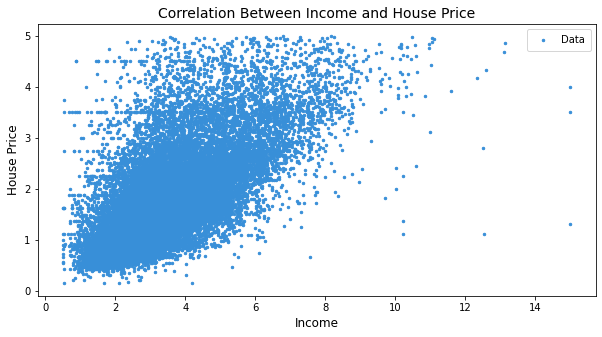

In [148]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################
    m,b = 0.1,0.1
    mse = list()
    for i in range(epochs):
      X = np.array(X)
      y = np.array(y)
      r = random.choice(np.arange(0,len(X)))
      Xi = X[r]
      yi = y[r]
      # Finding the miss of target
      er = yi - (m*Xi + b)
      # Now updating the error
      m = m - lr*(-2 *  np.sum(np.dot(Xi,er)) / batch_size)
      b = b - lr*(-2 *  np.sum(er) / batch_size)
      mse.append(mean_squared_error(y,m*X+b))
    return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

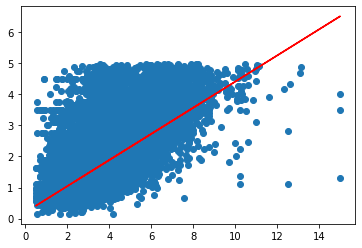

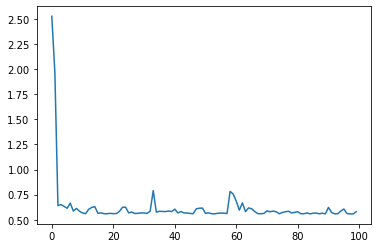

In [151]:
y_pred = m*X + b
plt.scatter(X, y)
plt.plot(X, y_pred,color="red")
plt.show()
plt.plot(range(len(mse)), mse)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



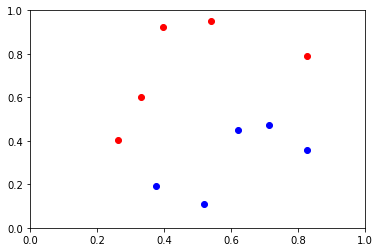

In [154]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    w = np.zeros(3)
    x =  np.c_[np.ones(len(x)),x]

    for i in range(0,epoch):
      n=1/(l_rate*(i+1));
      j = np.random.randint(len(x))

      
      exp = y[j]*(np.dot(w,x[j]))
      # print(exp)

      
      if (exp < 1):
        w = (1-n*l_rate)*w+n*((y[j]*x[j]))
      else:
        w = (1-n*l_rate)*w
      

    print(w)
    return w



---


**Run SVM Classifier**


---



In [156]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 150000, 0.001)

[-1.19333333 -6.80651234  9.89134537]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



In [157]:
print(w.shape)
# print(temp1.shape)
print(w[0])
print(X[1][1])
X.shape

(3,)
-1.1933333333333214
0.4023723736731163


(10, 2)

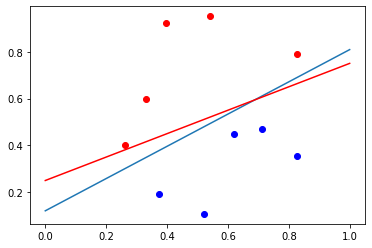

In [158]:
x= np.linspace(0,1,100)

#print(0.5*x- y + 0.5)

plt.plot(x,(-1*(((w[1]/w[2])*x)+(w[0]/w[2]))))
plt.plot(x,0.5*x + 0.25,'r')
# plt.plot(x,(-1*(((w[1]/w[2])*x)+((w[0]-1)/w[2]))),'b')
# plt.plot(x,(-1*(((w[1]/w[2])*x)+((w[0]+1)/w[2]))),'y')
# op=()
# for n in range(0,10):
#      op.append((w[1]*X[n][0])+(w[2]*X[n][1])+w[0])
#      plt.scatter(X[n][0]/X[n][1],op)

#plt.plot(x,np.dot(w))
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)